# COVID Risk Prediction

In this project, I will be looking at COVID information from Mexico to predict high risk patients and then find where more of the cases are in order to determine where to send supplies. 

This data was found on Kaggle and originates from the Mexican Government General Directorate of Epidemiology

(https://www.kaggle.com/datasets/marianarfranklin/mexico-covid19-clinical-data)

(https://www.gob.mx/salud/documentos/datos-abiertos-152127)

First I will Import all the necessary libraries

In [1]:
#Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sb_utils import save_file

In [2]:
df=pd.read_csv('221227COVID19MEXICO.csv')

C:\Users\aykal\AppData\Local\Temp\ipykernel_13496\3336534998.py:1: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('221227COVID19MEXICO.csv')


I will now explore the data. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6330966 entries, 0 to 6330965
Data columns (total 40 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   FECHA_ACTUALIZACION    object
 1   ID_REGISTRO            object
 2   ORIGEN                 int64 
 3   SECTOR                 int64 
 4   ENTIDAD_UM             int64 
 5   SEXO                   int64 
 6   ENTIDAD_NAC            int64 
 7   ENTIDAD_RES            int64 
 8   MUNICIPIO_RES          int64 
 9   TIPO_PACIENTE          int64 
 10  FECHA_INGRESO          object
 11  FECHA_SINTOMAS         object
 12  FECHA_DEF              object
 13  INTUBADO               int64 
 14  NEUMONIA               int64 
 15  EDAD                   int64 
 16  NACIONALIDAD           int64 
 17  EMBARAZO               int64 
 18  HABLA_LENGUA_INDIG     int64 
 19  INDIGENA               int64 
 20  DIABETES               int64 
 21  EPOC                   int64 
 22  ASMA                   int64 
 23  INMUSUP

This project starts out with 6,330,966 rows and 40 columns

In [4]:
df.head(5)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2022-12-27,10e0db,1,12,20,2,20,20,67,1,...,1,2,97,1,2,7,99,México,97,97
1,2022-12-27,0989f5,2,12,14,1,32,14,71,1,...,2,2,97,1,1,3,99,México,97,97
2,2022-12-27,01e27d,2,9,25,2,25,25,1,1,...,2,2,97,1,2,7,99,México,97,97
3,2022-12-27,180725,2,9,9,2,9,9,12,2,...,2,2,97,1,2,7,99,México,97,2
4,2022-12-27,0793b8,2,12,9,2,9,9,10,1,...,2,2,97,1,2,7,99,México,97,97


In [5]:
cols = df.columns.values
cols

array(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR',
       'ENTIDAD_UM', 'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES',
       'MUNICIPIO_RES', 'TIPO_PACIENTE', 'FECHA_INGRESO',
       'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA', 'EDAD',
       'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO',
       'CLASIFICACION_FINAL', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI'], dtype=object)

Since this data originates from the Mexican government, all of the column names are in Spanish. I am not very familiar with Spanish and so now I will rename the data to make it easier to refer back to each column and know what they are for. Doing this allows me to see what the column contains immediately, rather than having to look back at a list or dictionary of the column translations. 

In [6]:
df2={}
df2 = df.rename(columns={
    'FECHA_ACTUALIZACION' : 'Updated Date', 
    'ID_REGISTRO' : 'Registration ID', 
    'ORIGEN':'Origin', 
    'SECTOR':'Sector',     
    'ENTIDAD_UM': 'Entity', 
    'SEXO':'Sex', 
    'ENTIDAD_NAC':'Birth Entity', 
    'ENTIDAD_RES':'Residence Entity', 
    'MUNICIPIO_RES':'Residence Municipality', 
    'TIPO_PACIENTE':'Patient Type', 
    'FECHA_INGRESO':'Date Entry',    
    'FECHA_SINTOMAS':'Date Symptoms', 
    'FECHA_DEF':'Date Died', 
    'INTUBADO':'Intubated', 
    'NEUMONIA':'Pneumonia', 
    'EDAD':'Age',
    'NACIONALIDAD':'Nationality', 
    'EMBARAZO':'Pregnant', 
    'HABLA_LENGUA_INDIG':'Language', 
    'INDIGENA':'Indigenous',   
    'DIABETES':'Diabetes', 
    'EPOC':'COPD', 
    'ASMA':'Asthma', 
    'INMUSUPR':'Immunosuppresed', 
    'HIPERTENSION':'Hypertension', 
    'OTRA_COM':'Other Disease',
    'CARDIOVASCULAR':'Cardiovascular', 
    'OBESIDAD':'Obesity', 
    'RENAL_CRONICA':'Chronic Kidney', 
    'TABAQUISMO':'Tobacco',
    'OTRO_CASO':'COVID Contact', 
    'TOMA_MUESTRA_LAB':'Lab Sample', 
    'RESULTADO_LAB':'Sample Result',   
    'TOMA_MUESTRA_ANTIGENO':'Antigen Sample', 
    'RESULTADO_ANTIGENO':'Antigen Result', 
    'CLASIFICACION_FINAL':'COVID', 
    'MIGRANTE':'Migrant', 
    'PAIS_NACIONALIDAD':'Previous Nationality',
    'PAIS_ORIGEN':'Previous Origin', 
    'UCI':'ICU'
    })

df2.head(5)

,Updated Date,Registration ID,Origin,Sector,Entity,Sex,Birth Entity,Residence Entity,Residence Municipality,Patient Type,...,COVID Contact,Lab Sample,Sample Result,Antigen Sample,Antigen Result,COVID,Migrant,Previous Nationality,Previous Origin,ICU
0,2022-12-27,10e0db,1,12,20,2,20,20,67,1,...,1,2,97,1,2,7,99,México,97,97
1,2022-12-27,0989f5,2,12,14,1,32,14,71,1,...,2,2,97,1,1,3,99,México,97,97
2,2022-12-27,01e27d,2,9,25,2,25,25,1,1,...,2,2,97,1,2,7,99,México,97,97
3,2022-12-27,180725,2,9,9,2,9,9,12,2,...,2,2,97,1,2,7,99,México,97,2
4,2022-12-27,0793b8,2,12,9,2,9,9,10,1,...,2,2,97,1,2,7,99,México,97,97


Now I will check to see how many unique values are contained within each of the features. Most should have 2 or 3, as they are categorical data (Yes/No)

In [7]:
df2.nunique().sort_values(ascending=False)[:10]

Registration ID           6330966
Residence Municipality        544
Date Died                     361
Date Entry                    361
Date Symptoms                 360
Previous Nationality          172
Age                           128
Previous Origin               109
Birth Entity                   33
Entity                         32
dtype: int64

I can see from here that there are as many Registration IDs as there are values, this should tell me that there are going to be now duplicated values as each row has its own individual Registration ID. 

In [8]:
for c in df2.columns:
   if len(df2[c].unique()) >= 3 and len(df2[c].unique()) <=10:
        print(df2[c].value_counts(normalize=True))

97    0.959521
2     0.038711
1     0.001737
99    0.000031
Name: Intubated, dtype: float64
2     0.972857
1     0.016839
99    0.010304
Name: Pneumonia, dtype: float64
2     0.547050
97    0.433519
1     0.013215
98    0.006215
99    0.000002
Name: Pregnant, dtype: float64
2     0.932837
99    0.062511
1     0.004653
Name: Language, dtype: float64
2     0.932412
99    0.061127
1     0.006461
Name: Indigenous, dtype: float64
2     0.936805
1     0.059159
98    0.004035
Name: Diabetes, dtype: float64
2     0.990699
1     0.005363
98    0.003937
Name: COPD, dtype: float64
2     0.977628
1     0.018456
98    0.003916
Name: Asthma, dtype: float64
2     0.990965
1     0.005113
98    0.003922
Name: Immunosuppresed, dtype: float64
2     0.912628
1     0.083453
98    0.003919
Name: Hypertension, dtype: float64
2     0.973397
98    0.015832
1     0.010770
Name: Other Disease, dtype: float64
2     0.987941
1     0.008136
98    0.003923
Name: Cardiovascular, dtype: float64
2     0.937888
1     0.

I can see here a few things we will have to adjust
1. the Updated Date only has one value, so we can drop that
2. The registration ID is diffferent for every row, so we might not be needing this either
3. Age has 128 different values, that doesnt seem right, we may need to look into this more 
4. We don't really need the columns stating where the patient came from, as we are wanting to find out where to send supplies would be to where the patient currently is
5. We can drop a lot more of the demographic data such as indigenous and language, as they are related to whether or not the patient can speak a language or are of native blood
6. We can drop Intubated and ICU because these are features that are not determinant for being high risk as these would mainly be occuring after being admitted. 
7. COVID results vary from 1-7, 1-3 being a positive test and 4-7 being a negative test or inconclusive. I will change this so that it will be a clear 1 for positive and 2 for negative. 


In [9]:
df2=df2.drop(['Updated Date','Registration ID', 'Language','Indigenous','Sector','Lab Sample','Antigen Sample','Migrant', 'Previous Origin','Birth Entity','Previous Nationality',], axis=1)

In [10]:
df2[df2.duplicated()==True]

,Origin,Entity,Sex,Residence Entity,Residence Municipality,Patient Type,Date Entry,Date Symptoms,Date Died,Intubated,...,Other Disease,Cardiovascular,Obesity,Chronic Kidney,Tobacco,COVID Contact,Sample Result,Antigen Result,COVID,ICU
978,2,9,1,9,5,1,2022-01-01,2022-01-01,9999-99-99,97,...,2,2,2,2,2,2,97,2,7,97
997,1,9,2,9,10,1,2022-01-01,2022-01-01,9999-99-99,97,...,2,2,2,2,2,2,97,2,7,97
1011,1,9,1,9,10,1,2022-01-01,2022-01-01,9999-99-99,97,...,2,2,2,2,2,2,97,2,7,97
1238,2,9,2,9,5,1,2022-01-01,2022-01-01,9999-99-99,97,...,2,2,2,2,2,2,97,2,7,97
1249,2,9,2,9,5,1,2022-01-01,2022-01-01,9999-99-99,97,...,2,2,2,2,2,2,97,2,7,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6330949,2,15,1,15,999,1,2022-12-22,2022-12-22,9999-99-99,97,...,98,2,2,2,2,99,3,97,6,97
6330951,2,15,1,15,999,1,2022-12-22,2022-12-22,9999-99-99,97,...,98,2,2,2,2,99,3,97,6,97
6330954,2,15,1,15,999,1,2022-12-22,2022-12-22,9999-99-99,97,...,98,2,2,2,2,99,3,97,6,97
6330958,2,15,1,15,999,1,2022-12-22,2022-12-22,9999-99-99,97,...,98,2,2,2,2,99,3,97,6,97


In [11]:
missing = pd.concat([df2.isnull().sum(), 100 * df2.isnull().mean()], axis=1)
missing.columns=['count','%']
missing.sort_values(by='count')

,count,%
Origin,0,0.0
Antigen Result,0,0.0
Sample Result,0,0.0
COVID Contact,0,0.0
Tobacco,0,0.0
Chronic Kidney,0,0.0
Obesity,0,0.0
Cardiovascular,0,0.0
Other Disease,0,0.0
Hypertension,0,0.0


No missing or duplicated values immediately seen, but this quick search just tells us that there is a value put in every data point. This makes sense as there are 6 million different registration numbers. 

However, the data follows the following rule for the values:

1 is yes

2 is no

97 is not applicable

98 is ignored

99 is unspecified

For many of the features, the values 97, 98 and 99 could be considered missing values. 

I will now replace the values in the COVID column, as values of 1, 2, and 3 are considered positive test results and anything above that is a negative test result.

In [12]:
df2['COVID'] = df2['COVID'].replace([2,3], 1)
df2['COVID'] = df2['COVID'].replace([4,5,6,7], 2)

In [13]:
df2

,Origin,Entity,Sex,Residence Entity,Residence Municipality,Patient Type,Date Entry,Date Symptoms,Date Died,Intubated,...,Other Disease,Cardiovascular,Obesity,Chronic Kidney,Tobacco,COVID Contact,Sample Result,Antigen Result,COVID,ICU
0,1,20,2,20,67,1,2022-06-23,2022-06-21,9999-99-99,97,...,2,2,2,2,2,1,97,2,2,97
1,2,14,1,14,71,1,2022-08-09,2022-08-06,9999-99-99,97,...,2,2,2,2,2,2,97,1,1,97
2,2,25,2,25,1,1,2022-02-14,2022-02-14,9999-99-99,97,...,2,2,2,2,2,2,97,2,2,97
3,2,9,2,9,12,2,2022-01-19,2022-01-17,9999-99-99,2,...,2,2,2,2,2,2,97,2,2,2
4,2,9,2,9,10,1,2022-05-03,2022-05-03,9999-99-99,97,...,2,2,2,2,1,2,97,2,2,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6330961,2,15,2,15,999,1,2022-12-22,2022-12-22,9999-99-99,97,...,98,2,2,2,2,99,3,97,2,97
6330962,2,15,2,15,999,1,2022-12-22,2022-12-22,9999-99-99,97,...,98,2,2,2,2,99,1,97,1,97
6330963,2,15,2,15,999,1,2022-12-22,2022-12-22,9999-99-99,97,...,98,2,2,2,2,99,3,97,2,97
6330964,2,15,1,15,999,1,2022-12-23,2022-12-23,9999-99-99,97,...,98,2,2,2,2,99,97,97,2,97


I will now perform Chi-Square testing to find if there any relationships between our categorical variables 

Null Hypothesis = No difference or no relationship between "Classification Final" ( Whether the patient has COVID) and other features


Significance level = 0.05

If the P-Value is less than significance level, the hypothesis is rejected, meaning that there could be a relationship between the two features

In [14]:
import numpy as np
from scipy import stats 

In [15]:
compare = pd.crosstab(df['CLASIFICACION_FINAL'],df['OBESIDAD'])
print(compare)

OBESIDAD                 1        2      98
CLASIFICACION_FINAL                        
1                      4200    68968    337
2                        39      374      1
3                    201261  2852207  11328
4                        12      332      0
5                       546     8566     27
6                     10254   188798    677
7                    153059  2818490  11490


In [16]:
chi2, p, dof, ex=stats.chi2_contingency(compare)
print(f'Chi_square value: {chi2} \nP-Value: {p}\nDegrees of Freedom: {dof}\nExpected: {ex}')

Chi_square value: 5902.031143831834 
P-Value: 0.0
Degrees of Freedom: 12
Expected: [[4.28854228e+03 6.89394338e+04 2.77023964e+02]
 [2.41542276e+01 3.88285499e+02 1.56027374e+00]
 [1.78811063e+05 2.87443440e+06 1.15505331e+04]
 [2.00701795e+01 3.22633361e+02 1.29645934e+00]
 [5.33201658e+02 8.57135549e+03 3.44428544e+01]
 [1.16528979e+04 1.87323368e+05 7.52734091e+02]
 [1.74041070e+05 2.79775552e+06 1.12424092e+04]]


In [17]:
feature=[]
pvalue=[]

for c in df2.columns:
    if(df2[c].dtype == np.int64):
        compare = pd.crosstab(df2['COVID'],df2[c])
        chi2, p, dof, ex=stats.chi2_contingency(compare)
        pvalue.append(p)
        feature.append(c)

        df_pvalue = pd.DataFrame(list(zip(feature, pvalue)),columns=['feature','pvalue'])

In [18]:
df_pvalue

,feature,pvalue
0,Origin,0.000000e+00
1,Entity,0.000000e+00
2,Sex,1.686757e-95
3,Residence Entity,0.000000e+00
4,Residence Municipality,0.000000e+00
5,Patient Type,0.000000e+00
6,Intubated,0.000000e+00
7,Pneumonia,0.000000e+00
8,Age,0.000000e+00
9,Nationality,0.000000e+00


All of the features had a p-value below 0.05, this means that the null hypothesis is rejected and that there could be a relationship between the features and the target feature. 

We will perform feature selection later in order to reduce the amount of feautres that will go into the model. 

Next I will explore the data

In [19]:
percent_positive = round(sum(df2['COVID'] == 1) / len(df2['COVID']), 4) * 100
print(percent_positive,"% of patients tested positive for COVID")

positive = df2[df2['COVID'] == 1]
print(positive.shape)

49.58 % of patients tested positive for COVID
(3138715, 29)


It is interesting to see that about half of the patients tested positive for COVID. Lets see how many of the patients died and how many died from COVID. 

In [20]:
#Creating a new column to state is a person has died or not, 0 for alive, 1 for died
df2['Death'] = [0 if each=="9999-99-99" else 1 for each in df2['Date Died']]

In [21]:
df2['Death'].value_counts()

0    6290973
1      39993
Name: Death, dtype: int64

In [22]:
deaths_1=df2.drop(df2[(df2['Date Died'] == '9999-99-99')].index)

In [23]:
deaths_1['COVID'].value_counts()

1    25188
2    14805
Name: COVID, dtype: int64

I dropped all of the patients that did not have a death date, so they are presumably still alive. Out of the patients that had died, 25188 had COVID which is approximately 63% of total deaths (39993).

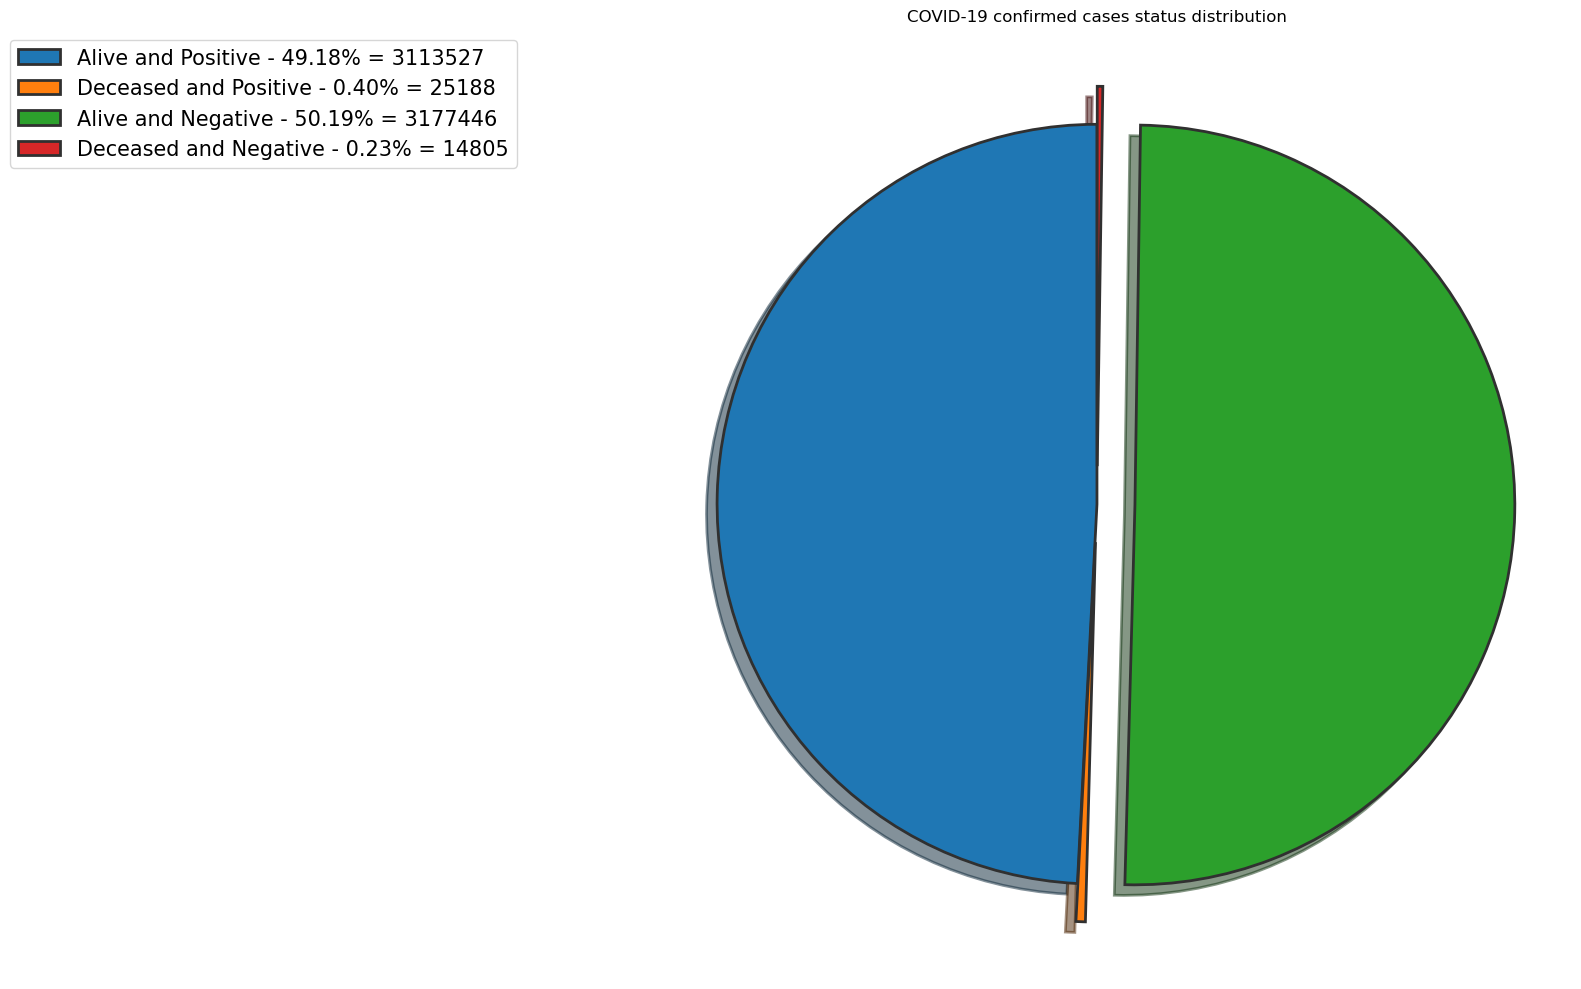

In [24]:
#Positive for COVID - Alive 
alive_positive = df2.loc[(df2['COVID'] == 1) & (df2['Date Died'] == '9999-99-99') & (df2['Date Died'].notnull())]
#Positive for COVID - Dead
dead_positive = df2.loc[(df2['COVID'] == 1) & (df2['Date Died'] != '9999-99-99') & (df2['Date Died'].notnull())]
#Negative for COVID - Alive 
alive_negative = df2.loc[(df2['COVID'] == 2 ) & (df2['Date Died'] == '9999-99-99') & (df2['Date Died'].notnull())]
#Negative for COVID - Dead
dead_negative = df2.loc[(df2['COVID'] == 2) & (df2['Date Died'] != '9999-99-99') & (df2['Date Died'].notnull())]

apcount = len(alive_positive)
dpcount = len(dead_positive)
ancount = len(alive_negative)
dncount = len(dead_negative)

sizes= np.array([apcount,dpcount,ancount,dncount])

# Plot
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title('COVID-19 confirmed cases status distribution')
patches, texts = ax1.pie(sizes,startangle=90, shadow=True, explode=(0.0,0.1,0.1,0.1),
                         wedgeprops={'linewidth': 2,"edgecolor":"#303030", 'linestyle': 'solid', 'antialiased': True})

porcent = 100.*sizes/sizes.sum()
tags = ['Alive and Positive', 'Deceased and Positive', 'Alive and Negative', 'Deceased and Negative']
labels = ['{0} - {1:0.2f}% = {2:0.0f}'.format(tags[x],porcent[x],sizes[x]) for x in range(len(tags))]

ax1.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=15)
fig.tight_layout()

I am also interested in seeing how the dates all align. 

In [25]:
df2['Date Symptoms'] = pd.to_datetime(df2['Date Symptoms'])
df2['Date Entry'] = pd.to_datetime(df2['Date Entry'])
deaths_1['Date Died'] = pd.to_datetime(deaths_1['Date Died'])

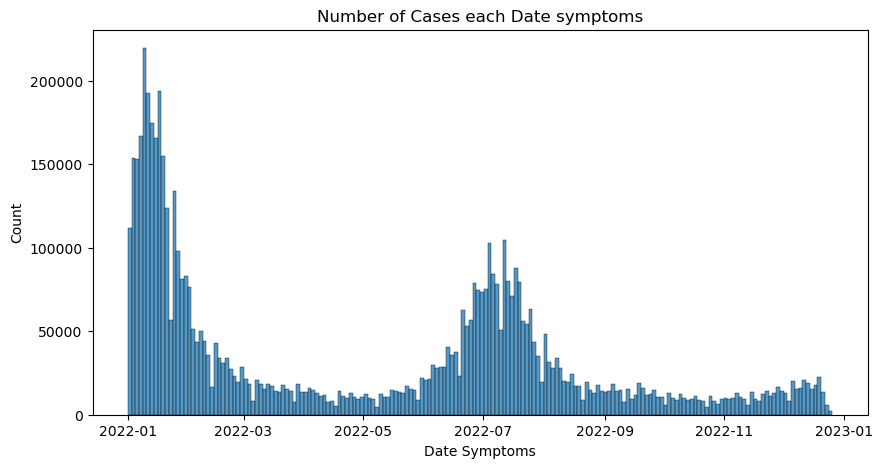

In [26]:
plt.figure(figsize=(10,5))
sns.histplot(x=df2['Date Symptoms'])
plt.title("Number of Cases each Date symptoms");

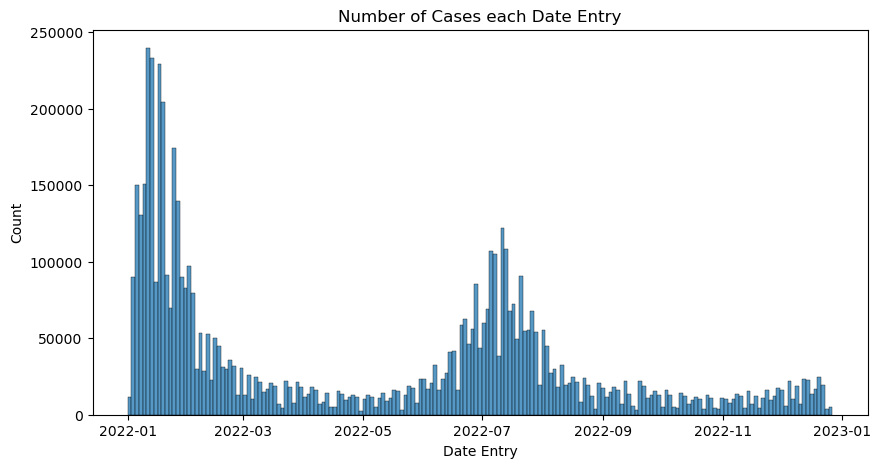

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(x=df2['Date Entry'])
plt.title("Number of Cases each Date Entry");

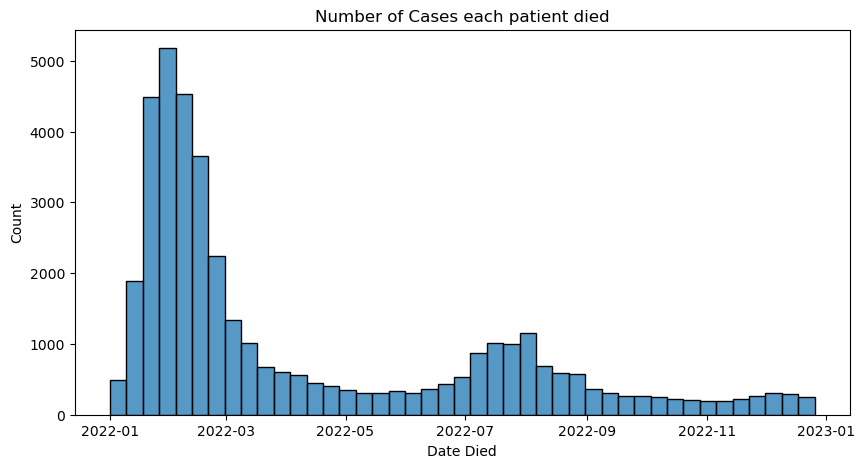

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(x=deaths_1['Date Died'])
plt.title("Number of Cases each patient died");

I feel that the datetime graphs make sense, the date entry and date died follows a similar pattern to the date symptoms with the date entry being slightly skewed a short period after the date symptoms. This would follow the logic that a patient would exhibit symptoms of COVID and then a few days later seek medical attention if they require it. 

Next, I will move on to the age column. I remember that there were more values in the age column than expected, so I will focus on cleaning it up now. 

In [29]:
df2['Age'].value_counts(ascending=True)

164         1
135         1
266         1
137         1
130         1
        ...  
31     155322
29     160056
30     160585
27     160833
28     162414
Name: Age, Length: 128, dtype: int64

I can see that there are some strange age values in there. I would assume that the data that states an age of 266 or 164 are incorrectly labeled, however, there is no way of checking this particular patient's information, so I will drop these values. With some additional research, I can see that there have been people all around the world who live to high ages around 120's, however I havent seen or heard of any that live to 130's. So I will drop any ages above 130. 

In [30]:
df2=df2[df2['Age']<130]

In [31]:
df2['Age'].value_counts(ascending=True)

118         7
116         7
121         7
120         9
117        10
        ...  
31     155322
29     160056
30     160585
27     160833
28     162414
Name: Age, Length: 123, dtype: int64

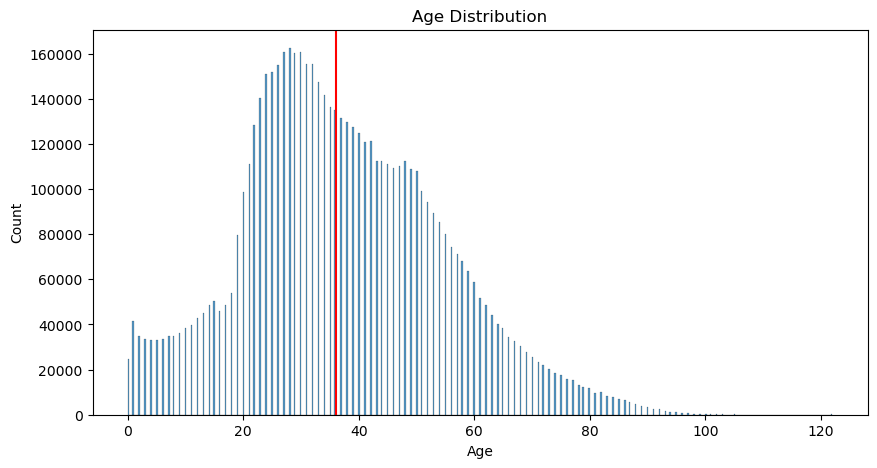

In [32]:
plt.figure(figsize=(10,5))
sns.histplot(x=df2['Age'])
plt.axvline(df2['Age'].median(), color='red')
plt.title("Age Distribution");

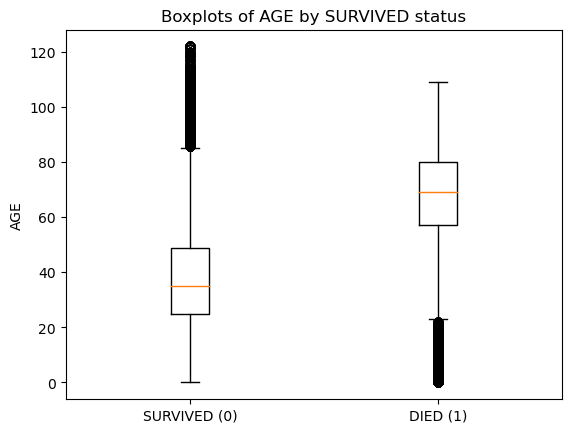


Mean age of all patients: 37.3 years

Mean age of those who survived: 37.1 years

Mean age of those who died: 66.1 years


In [33]:
# Boxplots of AGE by SURVIVED status
AGE_SURVIVED = df2[df2.Death == 0].Age
AGE_DIED = df2[df2.Death == 1].Age
plt.boxplot(x=[AGE_SURVIVED, AGE_DIED], labels=['SURVIVED (0)', 'DIED (1)'])
plt.ylabel("AGE")
plt.title("Boxplots of AGE by SURVIVED status")
plt.show()

# Mean age for each group
print("\nMean age of all patients: {} years".format(round(sum(df2.Age) / 
                                                    len(df2.Age), 1)))
print("\nMean age of those who survived: {} years".format(round(sum(df2[df2.Death == 0].Age) /   
                                                                len(df2[df2.Death == 0].Age), 1)))
print("\nMean age of those who died: {} years".format(round(sum(df2[df2.Death == 1].Age) / 
                                                    len(df2[df2.Death == 1].Age), 1)))


It is interesting to see that the mean age of patients who survived vs those who died. This is a bit expected as many elderly would be considered a vulnerable group, more likely to get ill and succumb to illness than younger age groups. 

Next, I will look at where the majority of the patients reside. 

In [34]:
mexentity=df2['Residence Entity']

In [35]:
mexentity

0          20
1          14
2          25
3           9
4           9
           ..
6330961    15
6330962    15
6330963    15
6330964    15
6330965    15
Name: Residence Entity, Length: 6330961, dtype: int64

Since the data is categorical, I must replace the values with the actual entity name. 

In [36]:
mexentity=mexentity.replace({1 : 'AGUASCALIENTES',
          2 : 'BAJA CALIFORNIA',
          3 : 'BAJA CALIFORNIA SUR',
          4 : 'CAMPECHE',
          5 : 'COAHUILA DE ZARAGOZA',
          6 : 'COLIMA',
          7 : 'CHIAPAS',
          8 : 'CHIHUAHUA',
          9 : 'CIUDAD DE MÉXICO',
          10 : 'DURANGO',
          11 : 'GUANAJUATO',
          12 : 'GUERRERO',
          13 : 'HIDALGO',
          14 : 'JALISCO',
          15 : 'MÉXICO',
          16 : 'MICHOACÁN DE OCAMPO',
          17 : 'MORELOS',
          18 : 'NAYARIT',
          19 : 'NUEVO LEÓN',
          20 : 'OAXACA',
          21 : 'PUEBLA',
          22 : 'QUERÉTARO',
          23 : 'QUINTANA ROO',
          24 : 'SAN LUIS POTOSÍ',
          25 : 'SINALOA',
          26 : 'SONORA',
          27 : 'TABASCO',
          28 : 'TAMAULIPAS',
          29 : 'TLAXCALA',
          30 : 'VERACRUZ DE IGNACIO DE LA LLAVE',
          31 : 'YUCATÁN',
          32 : 'ZACATECAS',
          36 : 'ESTADOS UNIDOS MEXICANOS'})

I will double check that this worked

In [37]:
mexentity

0                    OAXACA
1                   JALISCO
2                   SINALOA
3          CIUDAD DE MÉXICO
4          CIUDAD DE MÉXICO
                 ...       
6330961              MÉXICO
6330962              MÉXICO
6330963              MÉXICO
6330964              MÉXICO
6330965              MÉXICO
Name: Residence Entity, Length: 6330961, dtype: object

Text(0, 0.5, 'Residence Entity')

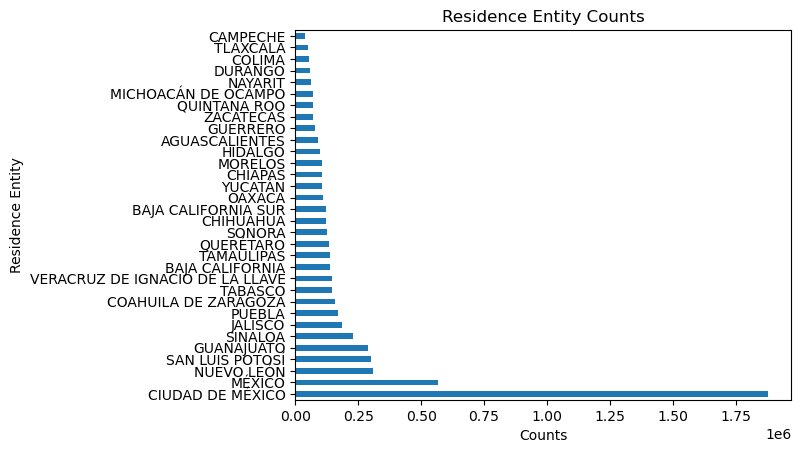

In [38]:
mexentity.value_counts().plot(kind='barh')
plt.title('Residence Entity Counts')
plt.xlabel('Counts')
plt.ylabel('Residence Entity')

The two entities that have the most patients are Mexico and Mexico City. 

Now I will graph some of the other features

Text(0, 0.5, 'Count')

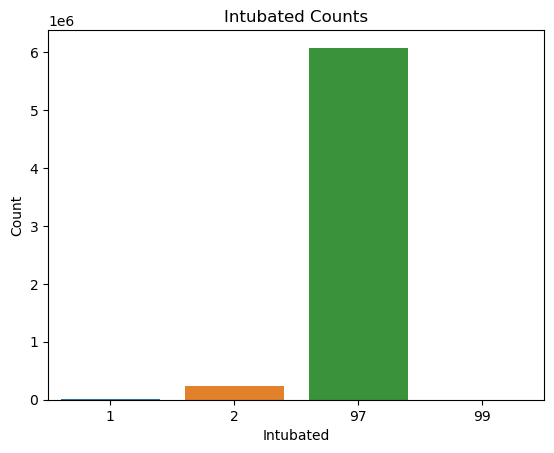

In [39]:
#Intubated
sns.barplot(x=df2.Intubated.value_counts().index, y=df2.Intubated.value_counts())
plt.title('Intubated Counts')
plt.xlabel('Intubated')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

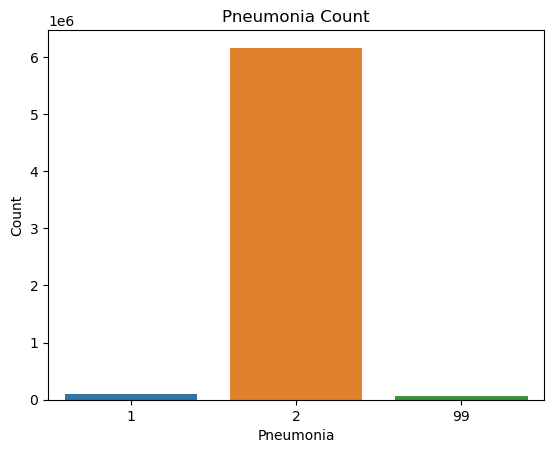

In [40]:
#Pneumonia
sns.barplot(x=df2.Pneumonia.value_counts().index, y=df2.Pneumonia.value_counts())
plt.title('Pneumonia Count')
plt.xlabel('Pneumonia')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

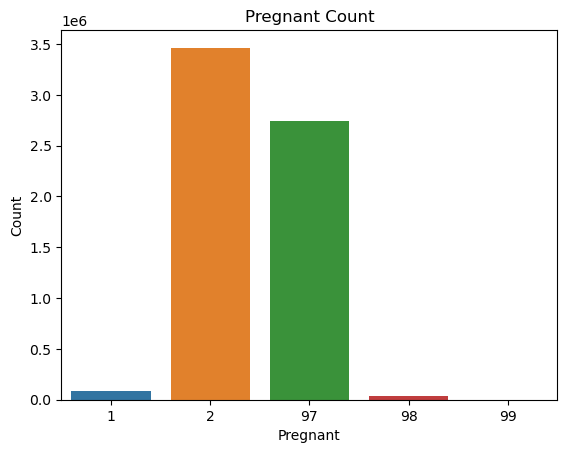

In [41]:
#Pregnant
sns.barplot(x=df2.Pregnant.value_counts().index, y=df2.Pregnant.value_counts())
plt.title('Pregnant Count')
plt.xlabel('Pregnant')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

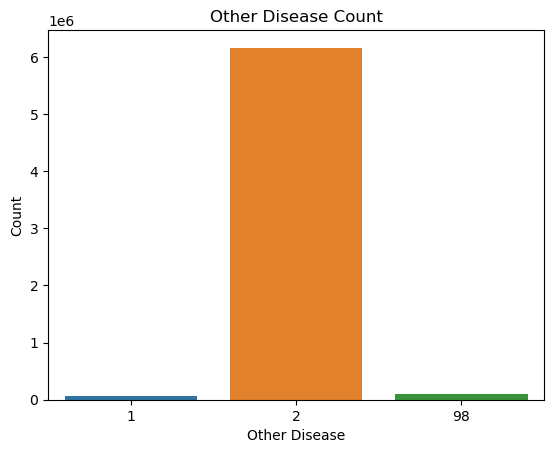

In [42]:
#Other Disease
sns.barplot(x=df2['Other Disease'].value_counts().index, y=df2['Other Disease'].value_counts())
plt.title('Other Disease Count')
plt.xlabel('Other Disease')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

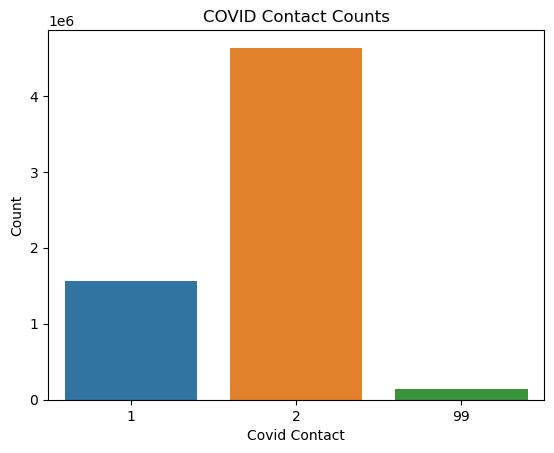

In [43]:
#COVID Contact
sns.barplot(x=df2['COVID Contact'].value_counts().index, y=df2['COVID Contact'].value_counts())
plt.title('COVID Contact Counts')
plt.xlabel('Covid Contact')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

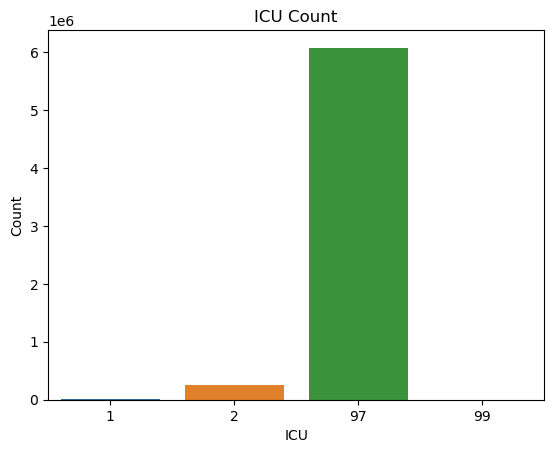

In [44]:
#'ICU'
sns.barplot(x=df2.ICU.value_counts().index, y=df2.ICU.value_counts())
plt.title('ICU Count')
plt.xlabel('ICU')
plt.ylabel('Count')

In [45]:
datapath = '../data'

save_file(df2, 'coviddata.csv', datapath)

Writing file.  "../data\coviddata.csv"
